<a href="https://colab.research.google.com/github/MARYANNE67/SEM420-As1/blob/main/SEM405_Ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Export data to dataframe

In [ ]:
# Load Modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ='/content/drive/MyDrive/StatAss1/data.csv'
df = pd.read_csv(path)

### Data Exploration

In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Check the columns present in the dataset
print(df.columns)

# Get a summary of the dataset
print(df.info())

# Descriptive statistics of numerical columns
print(df.describe())


   year  month duoarea area-name product product-name process  \
0  2014      1     SFL   FLORIDA    EPG0  Natural Gas     VCS   
1  2014      1     SNH    USA-NH    EPG0  Natural Gas     VCS   
2  2014      1     SOR    USA-OR    EPG0  Natural Gas     VCS   
3  2014      1     SDE    USA-DE    EPG0  Natural Gas     VCS   
4  2014      1     SAZ    USA-AZ    EPG0  Natural Gas     VCS   

             process-name    series  \
0  Commercial Consumption  N3020FL2   
1  Commercial Consumption  N3020NH2   
2  Commercial Consumption  N3020OR2   
3  Commercial Consumption  N3020DE2   
4  Commercial Consumption  N3020AZ2   

                                  series-description   value units  
0  Natural Gas Deliveries to Commercial Consumers...  6605.0  MMCF  
1  Natural Gas Deliveries to Commercial Consumers...  1691.0  MMCF  
2  Natural Gas Deliveries to Commercial Consumers...  4711.0  MMCF  
3  Natural Gas Deliveries to Commercial Consumers...  2128.0  MMCF  
4  Natural Gas Deliveries to 

**Based on the output of data exploration, here are some key observations**
    Completed By Mary-Anne

**Dataset Structure**:

    - The dataset contains 37,994 entries and 12 columns.
    - Columns include information about the year, month, geographical area, product, consumption process, and consumption value, among others.
**Data Types:**

    - Year and month columns are integers, while other columns are of object data type, except for the 'value' column which is a float.

    - 'Value' column represents the consumption amount in millions of cubic feet (MMcf).

**Missing Values:**

    - The 'value' column has missing values (approximately 476 missing values).

**Descriptive Statistics:**

    - The dataset spans from the year 2014 to 2024.
    - The average consumption value is approximately 29,708 MMcf, with a standard deviation of around 150,420 MMcf.
    - The minimum consumption value is 0 MMcf, while the maximum is approximately 3,391,775 MMcf.

###Data Cleaning

------

    Completed By Mary-Anne

  1. rename fields for better understanding retrivale
  2. drop unnecessary columns:
        - duoarea : code for state or region -> can use area_name instead
        - product : energy product code  -> can use energy product name instead
        - series: A unique identifier for the data series. -> can use series description instead
        - unit : always Million cubic Feet. -> can use value changed name to natural_gas_consumption_Million_Cubic_Feet
  3. remove null values in place



In [ ]:
# remove some columns
columns_to_drop = ['duoarea', 'product', 'series', 'units']
df.drop(columns=columns_to_drop, inplace=True)

# rename some colunms for better readability and reference
new_columns ={
    "process": "sector_code",
    "process-name": "sector-name",
    "series-description": "description",
    "value": "natural_gas_consumption_Million_Cubic_Feet",
    "area-name": "state_or_region_name",
    "product-name": "energy_product_name",
}

df = df.rename(columns=new_columns)

# Check for missing values
print(df.isnull().sum())

#drop missiong values
df.dropna(inplace=True)



year                                            0
month                                           0
state_or_region_name                            0
energy_product_name                             0
sector_code                                     0
sector-name                                     0
description                                     0
natural_gas_consumption_Million_Cubic_Feet    476
dtype: int64


### **Task 1**

------

    Completed By Mary-Anne

- Select the column (feature/variable) on which you want to conduct the statistical  analysis. Please note that this feature depends on the goal you are trying to achieve and the questions you are attempting to answer.

  *   year: This column is essential for analyzing trends over time and identifying any changes in natural gas consumption patterns across different years.

  *   month: Analyzing seasonal trends in natural gas consumption requires this column to understand variations in consumption levels throughout the year.

  *   state_or_region_name: Understanding natural gas consumption across different states or regions is a key aspect of the analysis, so the state or region name column is necessary.

  *   sector_code & sector_name: This column represents the sector or consumption process code, which is crucial for categorizing consumption into residential, commercial, industrial, and other sectors as per the company's goals.

  *   natural_gas_consumption_Million_Cubic_Feet: This column contains the actual consumption data in million cubic feet, serving as the primary variable for analysis.

In [ ]:
selected_columns = ['year', 'month', 'state_or_region_name', 'sector-name', 'sector_code', 'natural_gas_consumption_Million_Cubic_Feet']
df_selected = df[selected_columns]

# Check the selected DataFrame
print(df_selected.head(20).to_string(index=False))

 year  month state_or_region_name              sector-name sector_code  natural_gas_consumption_Million_Cubic_Feet
 2014      1              FLORIDA   Commercial Consumption         VCS                                      6605.0
 2014      1               USA-NH   Commercial Consumption         VCS                                      1691.0
 2014      1               USA-OR   Commercial Consumption         VCS                                      4711.0
 2014      1               USA-DE   Commercial Consumption         VCS                                      2128.0
 2014      1               USA-AZ   Commercial Consumption         VCS                                      3915.0
 2014      1               USA-WV   Commercial Consumption         VCS                                      3787.0
 2014      1               USA-HI   Commercial Consumption         VCS                                       177.0
 2014      1               USA-NM   Commercial Consumption         VCS          

### **Task 2**

------

    Completed By Mary-Anne
- Graphically represent data from this column. Use histogram and box plot (and any  other graphs you want) for this part. Please label all graphs. Interpret the  observations from each graph and explain what each one is telling you. Provide  detailed explanations of your findings in 1 paragraph.

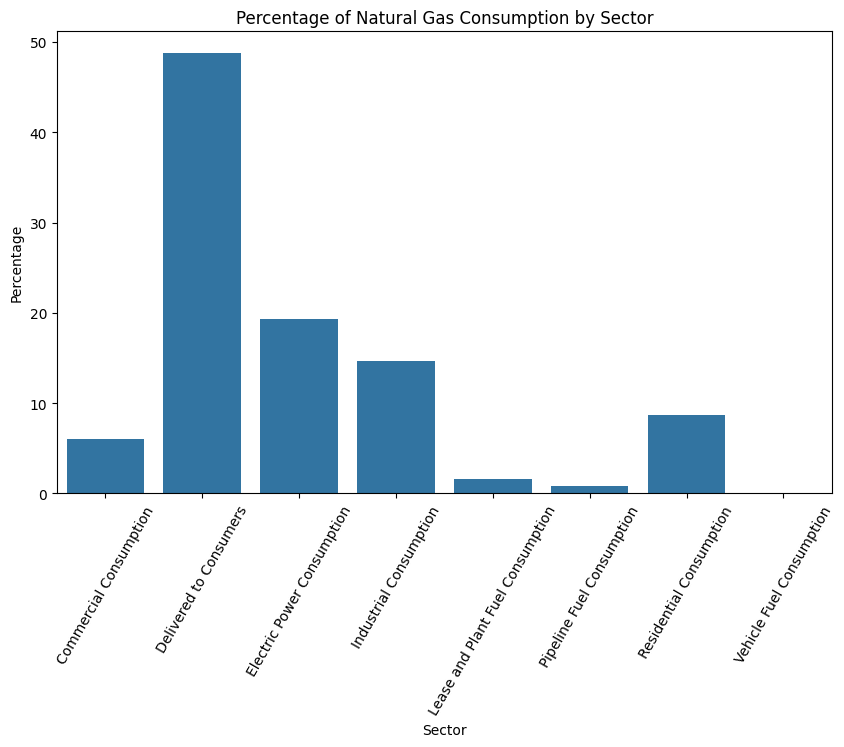

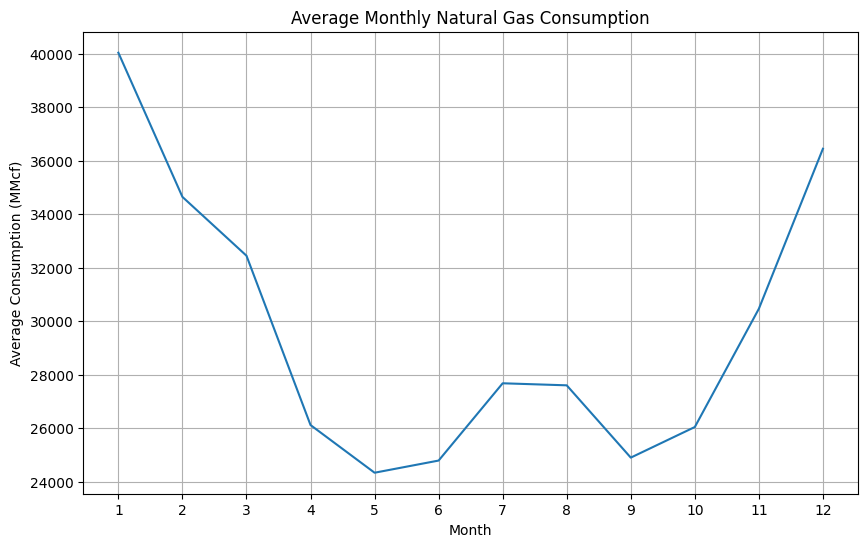

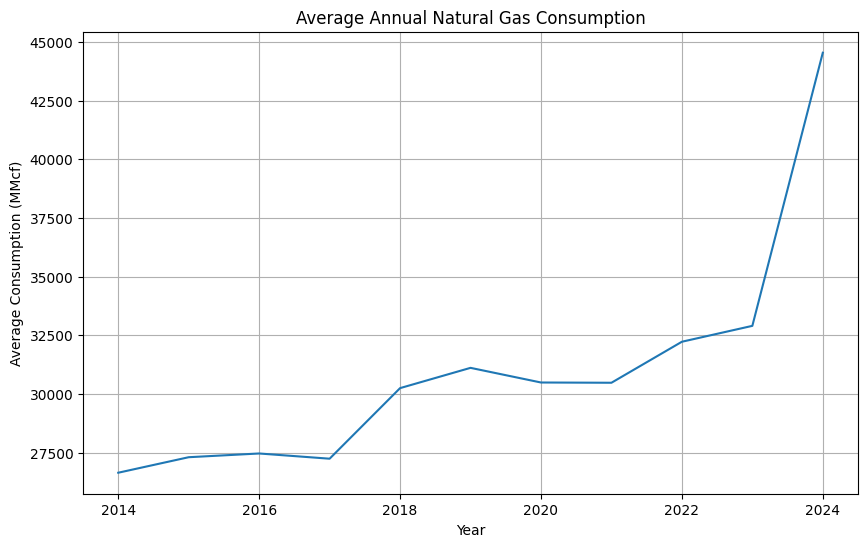

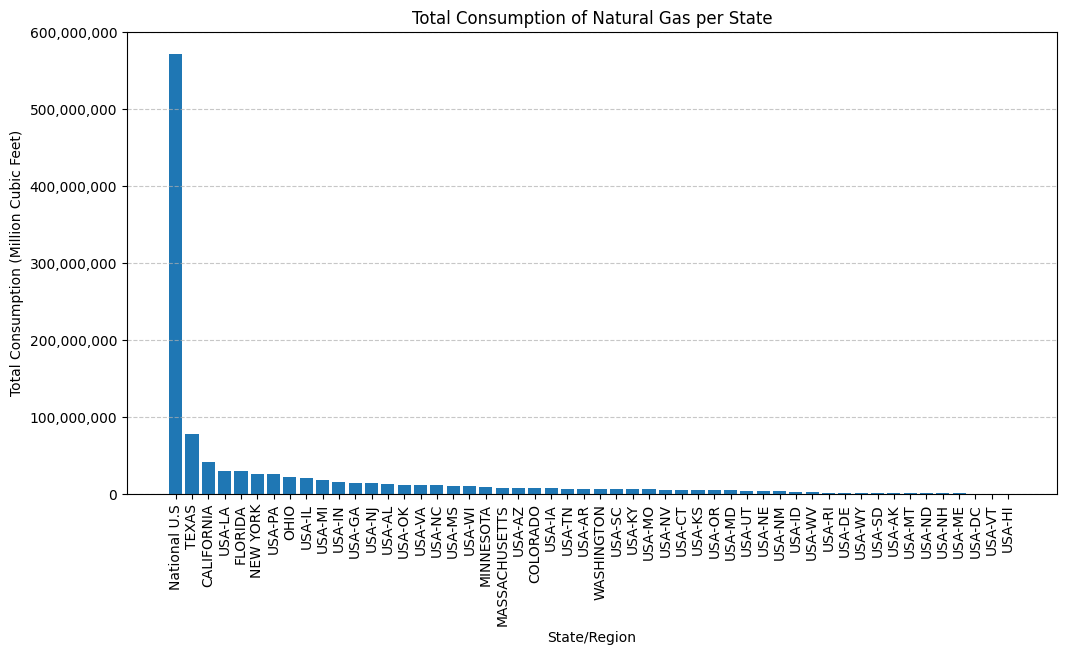

In [74]:
# Distribution of Natural Gas Usage Among Sectors
sector_consumption = df.groupby('sector-name')['natural_gas_consumption_Million_Cubic_Feet'].sum()
# print(sector_consumption)

# Distribution of Natural Gas Usage Among States/Region
state_consumption = df.groupby('state_or_region_name')['natural_gas_consumption_Million_Cubic_Feet'].sum()
# print(state_consumption)

# Variation in Consumption Between Sectors
sector_percentage = sector_consumption / sector_consumption.sum() * 100
state_percentage = state_consumption / state_consumption.sum() * 100

# print(sector_percentage)

# Visualization of Consumption Variation Between Sectors
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_percentage.index, y=sector_percentage.values)
plt.title('Percentage of Natural Gas Consumption by Sector')
plt.xlabel('Sector')
plt.ylabel('Percentage')
plt.xticks(rotation=60)
plt.show()

# Exploration of Seasonal Trends
monthly_consumption = df.groupby('month')['natural_gas_consumption_Million_Cubic_Feet'].mean()
# print(monthly_consumption)

# Visualization of Seasonal Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_consumption.index, y=monthly_consumption.values)
plt.title('Average Monthly Natural Gas Consumption')
plt.xlabel('Month')
plt.ylabel('Average Consumption (MMcf)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


# Exploration of Annual Trends
annual_consumption = df.groupby('year')['natural_gas_consumption_Million_Cubic_Feet'].mean()

# Visualization of Annual Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=annual_consumption.index, y=annual_consumption.values)
plt.title('Average Annual Natural Gas Consumption')
plt.xlabel('Year')
plt.ylabel('Average Consumption (MMcf)')
plt.grid(True)
plt.show()


# Visualization of Consumption Variation Between State
total_consumption_per_state = state_consumption.sort_values(ascending=False)

# Replace 'US' with 'National US' in the index
total_consumption_per_state.index = total_consumption_per_state.index.where(total_consumption_per_state.index != 'U.S.', 'National U.S')
plt.figure(figsize=(12, 6))
plt.bar(total_consumption_per_state.index, total_consumption_per_state)
plt.title('Total Consumption of Natural Gas per State')
plt.xlabel('State/Region')
plt.ylabel('Total Consumption (Million Cubic Feet)')
plt.xticks(rotation=90)

# Format y-axis labels as whole numbers
plt.gca().yaxis.set_major_formatter('{x:,.0f}')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### **Task 3**

------

    Completed By Mary-Anne
- Numerically represent data from this column. Use mean, median, mode,  percentiles, quartiles, range, variance, standard deviation, and 1% and 2.5%  trimmed mean. Interpret your findings. Provide detailed explanations of your findings in 1 paragraph.

In [ ]:
# Calculate descriptive statistics
mean_consumption = np.mean(df['natural_gas_consumption_Million_Cubic_Feet'])
median_consumption = np.median(df['natural_gas_consumption_Million_Cubic_Feet'])
mode_consumption = df['natural_gas_consumption_Million_Cubic_Feet'].mode()[0]
percentile_25 = np.percentile(df['natural_gas_consumption_Million_Cubic_Feet'], 25)
percentile_75 = np.percentile(df['natural_gas_consumption_Million_Cubic_Feet'], 75)
range_consumption = np.max(df['natural_gas_consumption_Million_Cubic_Feet']) - np.min(df['natural_gas_consumption_Million_Cubic_Feet'])
variance_consumption = np.var(df['natural_gas_consumption_Million_Cubic_Feet'])
std_dev_consumption = np.std(df['natural_gas_consumption_Million_Cubic_Feet'])
trimmed_mean_1 = stats.trim_mean(df['natural_gas_consumption_Million_Cubic_Feet'], 0.1)
trimmed_mean_2_5 = stats.trim_mean(df['natural_gas_consumption_Million_Cubic_Feet'], 0.25)

# Print descriptive statistics
print("Descriptive Statistics for Natural Gas Consumption:")
print("-------------------------------------------------")
print("Mean Consumption: {:.2f} MMcf".format(mean_consumption))
print("Median Consumption: {:.2f} MMcf".format(median_consumption))
print("Mode Consumption: {:.2f} MMcf".format(mode_consumption))
print("25th Percentile (Q1): {:.2f} MMcf".format(percentile_25))
print("75th Percentile (Q3): {:.2f} MMcf".format(percentile_75))
print("Range of Consumption: {:.2f} MMcf".format(range_consumption))
print("Variance of Consumption: {:.2f} MMcf^2".format(variance_consumption))
print("Standard Deviation of Consumption: {:.2f} MMcf".format(std_dev_consumption))
print("1% Trimmed Mean Consumption: {:.2f} MMcf".format(trimmed_mean_1))
print("2.5% Trimmed Mean Consumption: {:.2f} MMcf".format(trimmed_mean_2_5))

Descriptive Statistics for Natural Gas Consumption:
-------------------------------------------------
Mean Consumption: 29708.26 MMcf
Median Consumption: 4380.00 MMcf
Mode Consumption: 0.00 MMcf
25th Percentile (Q1): 809.25 MMcf
75th Percentile (Q3): 16163.50 MMcf
Range of Consumption: 3391775.00 MMcf
Variance of Consumption: 22625683483.71 MMcf^2
Standard Deviation of Consumption: 150418.36 MMcf
1% Trimmed Mean Consumption: 8586.83 MMcf
2.5% Trimmed Mean Consumption: 5592.62 MMcf



**Based on the descriptive statistics provide valuable insights into the distribution and central tendency of natural gas consumption in the dataset.**

The mean consumption of approximately 29,708 MMcf indicates the average level of consumption across all data points, while the median consumption of 4,380 MMcf suggests the middle value of the data, which is less affected by extreme values. The mode of 0 MMcf indicates that there are instances of zero consumption, which could be due to missing data or periods of no consumption. The 25th percentile consumption of 809.25 MMcf and the 75th percentile consumption of 16,163.5 MMcf illustrate the range of consumption levels, with 25% of the data falling below 809.25 MMcf and 75% falling below 16,163.5 MMcf. The wide range of 3,391,775 MMcf highlights the variability in consumption levels, with the maximum consumption being significantly higher than the minimum. The variance of approximately 22.6 billion and standard deviation of around 150,418 MMcf quantify the spread or dispersion of the data around the mean, indicating the degree of variability in consumption. The 1% trimmed mean of 8,586.83 MMcf and the 2.5% trimmed mean of 5,592.62 MMcf provide robust estimates of average consumption after excluding a small percentage of extreme values, offering insights into typical consumption levels while mitigating the influence of outliers. These descriptive statistics collectively offer a comprehensive understanding of the distribution, variability, and central tendency of natural gas consumption in the dataset, facilitating informed decision-making and analysis.`

### **Task 4**
> Completed by Abby
---

Does the graphical result align with the numerical findings? Provide detailed explanations of your findings in 1 paragraph.

As graphs represent the average consumption, we can see that the mean fall into this graphs. As for the median, it isn't showned in the graph plotted. Mode Consumption isn't there too, which could be due to missing data or periods of no consumption. As for 25th and 75th percentile, it isn't showed in the graph. As for the range, we don't actually see it entirely through the graphs but we can see range between the different values there is in the Average Consumption. As for the variance and standard deviation, we don't actually see the whole value through the graph, but can notice that data spreads out a lot from the mean. With 1% and 2.5% trimmed mean, the mean goes down with a big difference with original mean, it is not well appreciated in the graph although.

### **Task 5**
> Completed by Chloe

---



Draw a simple random sample from the population (10% of the population). Repeat graphical and numerical analysis. Provide detailed explanations of your  findings and comment on any changes and/or anything interesting about this  sample. Explain in 1-2 paragraphs.

Descriptive Statistics for Sampled Natural Gas Consumption:
-------------------------------------------------
Mean Consumption: 30732.64 MMcf
Median Consumption: 4355.00 MMcf
Mode Consumption: 0.00 MMcf
25th Percentile (Q1): 873.00 MMcf
75th Percentile (Q3): 14837.50 MMcf
Range of Consumption: 3391775.00 MMcf
Variance of Consumption: 27425199741.26 MMcf^2
Standard Deviation of Consumption: 165605.55 MMcf
1% Trimmed Mean Consumption: 8224.40 MMcf
2.5% Trimmed Mean Consumption: 5343.25 MMcf


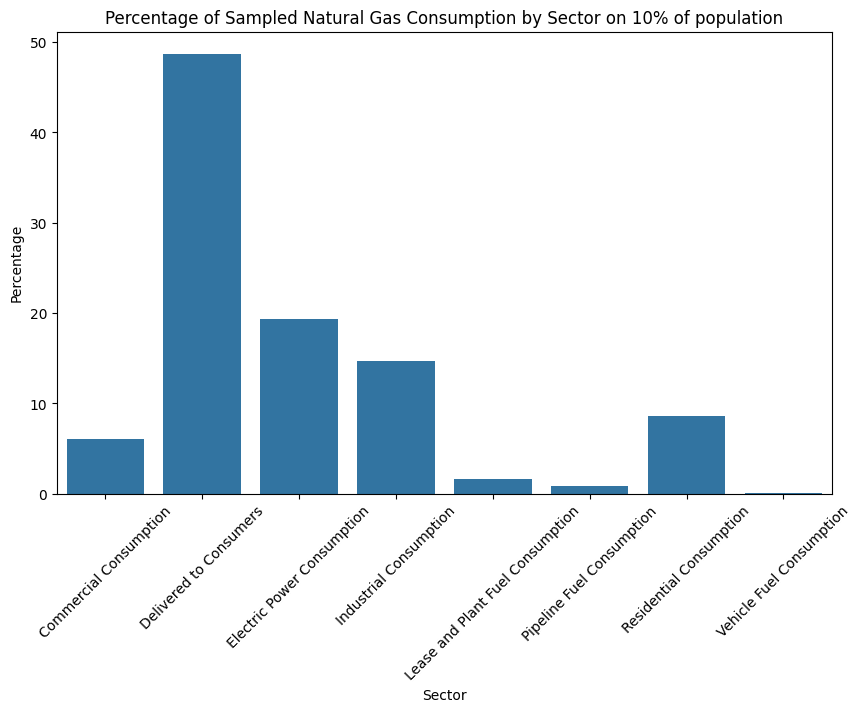

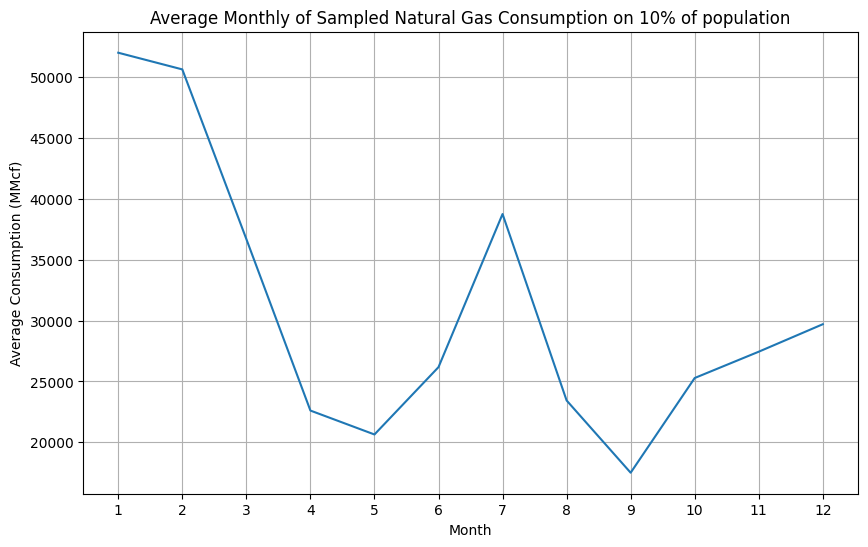

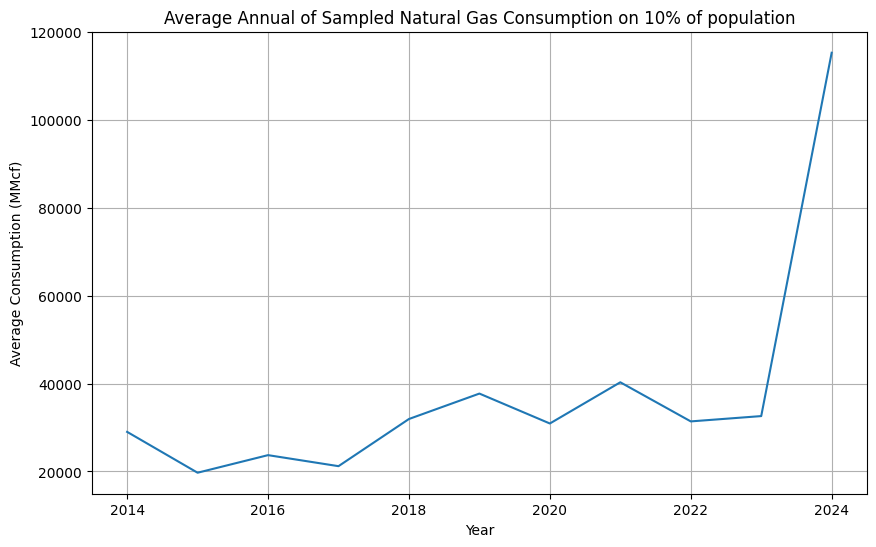

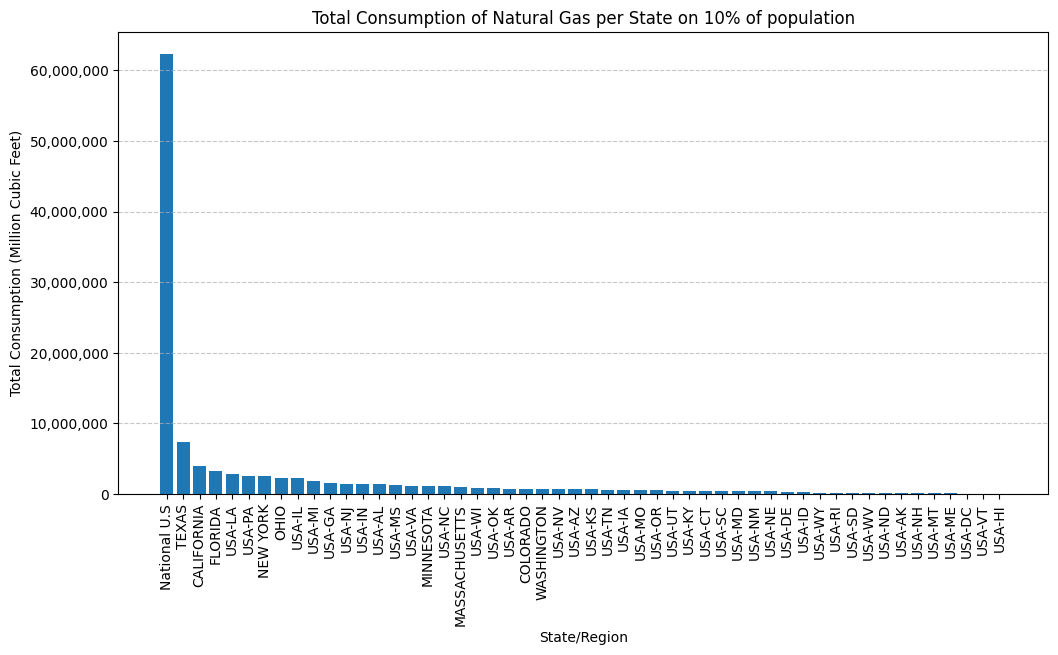

In [76]:
sample_df = df.sample(frac=0.1, random_state=1) # Note: Change random_state for different samples

# print(sample_df.describe())

# NUMERICAL ANALYSIS
mean_consumption_sample = np.mean(sample_df['natural_gas_consumption_Million_Cubic_Feet'])
mean_consumption = np.mean(sample_df['natural_gas_consumption_Million_Cubic_Feet'])
median_consumption = np.median(sample_df['natural_gas_consumption_Million_Cubic_Feet'])
mode_consumption = sample_df['natural_gas_consumption_Million_Cubic_Feet'].mode()[0]
percentile_25 = np.percentile(sample_df['natural_gas_consumption_Million_Cubic_Feet'], 25)
percentile_75 = np.percentile(sample_df['natural_gas_consumption_Million_Cubic_Feet'], 75)
range_consumption = np.max(sample_df['natural_gas_consumption_Million_Cubic_Feet']) - np.min(df['natural_gas_consumption_Million_Cubic_Feet'])
variance_consumption = np.var(sample_df['natural_gas_consumption_Million_Cubic_Feet'])
std_dev_consumption = np.std(sample_df['natural_gas_consumption_Million_Cubic_Feet'])
trimmed_mean_1 = stats.trim_mean(sample_df['natural_gas_consumption_Million_Cubic_Feet'], 0.1)
trimmed_mean_2_5 = stats.trim_mean(sample_df['natural_gas_consumption_Million_Cubic_Feet'], 0.25)

# Print descriptive statistics
print("Descriptive Statistics for Sampled Natural Gas Consumption:")
print("-------------------------------------------------")
print("Mean Consumption: {:.2f} MMcf".format(mean_consumption))
print("Median Consumption: {:.2f} MMcf".format(median_consumption))
print("Mode Consumption: {:.2f} MMcf".format(mode_consumption))
print("25th Percentile (Q1): {:.2f} MMcf".format(percentile_25))
print("75th Percentile (Q3): {:.2f} MMcf".format(percentile_75))
print("Range of Consumption: {:.2f} MMcf".format(range_consumption))
print("Variance of Consumption: {:.2f} MMcf^2".format(variance_consumption))
print("Standard Deviation of Consumption: {:.2f} MMcf".format(std_dev_consumption))
print("1% Trimmed Mean Consumption: {:.2f} MMcf".format(trimmed_mean_1))
print("2.5% Trimmed Mean Consumption: {:.2f} MMcf".format(trimmed_mean_2_5))

# GRAPHICAL ANALYSIS
sector_consumption_sample = sample_df.groupby('sector-name')['natural_gas_consumption_Million_Cubic_Feet'].sum()
# print(sector_consumption_sample)

# Distribution of Natural Gas Usage Among States/Region on 10% of population
state_consumption = sample_df.groupby('state_or_region_name')['natural_gas_consumption_Million_Cubic_Feet'].sum()
# print(state_consumption)

# Variation in Consumption Between Sectors on 10% of population
sector_percentage = sector_consumption / sector_consumption.sum() * 100
# print(sector_percentage)

# Visualization of Consumption Variation Between Sectors on 10% of population
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_percentage.index, y=sector_percentage.values)
plt.title('Percentage of Sampled Natural Gas Consumption by Sector on 10% of population')
plt.xlabel('Sector')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

# Exploration of Seasonal Trends on 10% of population
monthly_consumption = sample_df.groupby('month')['natural_gas_consumption_Million_Cubic_Feet'].mean()
# print(monthly_consumption)

# Visualization of Seasonal Trends on 10% of population
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_consumption.index, y=monthly_consumption.values)
plt.title('Average Monthly of Sampled Natural Gas Consumption on 10% of population')
plt.xlabel('Month')
plt.ylabel('Average Consumption (MMcf)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Exploration of Annual Trends on 10% of population
annual_consumption = sample_df.groupby('year')['natural_gas_consumption_Million_Cubic_Feet'].mean()

# Visualization of Annual Trends on 10% of population
plt.figure(figsize=(10, 6))
sns.lineplot(x=annual_consumption.index, y=annual_consumption.values)
plt.title('Average Annual of Sampled Natural Gas Consumption on 10% of population')
plt.xlabel('Year')
plt.ylabel('Average Consumption (MMcf)')
plt.grid(True)
plt.show()

# Distribution of Natural Gas Usage Among States/Region
total_consumption_per_state = state_consumption.sort_values(ascending=False)

# Replace 'US' with 'National US' in the index
total_consumption_per_state.index = total_consumption_per_state.index.where(total_consumption_per_state.index != 'U.S.', 'National U.S')
plt.figure(figsize=(12, 6))
plt.bar(total_consumption_per_state.index, total_consumption_per_state)
plt.title('Total Consumption of Natural Gas per State on 10% of population' )
plt.xlabel('State/Region')
plt.ylabel('Total Consumption (Million Cubic Feet)')
plt.xticks(rotation=90)

# Format y-axis labels as whole numbers
plt.gca().yaxis.set_major_formatter('{x:,.0f}')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




### **Task 6**
> Completed by Chloe

---



Construct 75%, 85%, and 95% confidence interval for the population mean. Provide  detailed explanations of your findings in 1 paragraph.  

In [ ]:
from scipy import stats
from scipy.stats import t

mean_consumption = np.mean(df['natural_gas_consumption_Million_Cubic_Feet'])
sem_consumption = stats.sem(df['natural_gas_consumption_Million_Cubic_Feet'], nan_policy='omit') # calculate standard error

# calculate confidence intervals
confidence_levels = [0.75, 0.85, 0.95]
n = len(df['natural_gas_consumption_Million_Cubic_Feet'])
degrees_freedom = n - 1

for confidence in confidence_levels:
    # Calculate the t-critical value
    t_critical = t.ppf((1 + confidence) / 2, df=degrees_freedom)

    # Calculate the margin of error
    margin_of_error = t_critical * sem_consumption

    # Calculate the confidence interval
    ci_lower = mean_consumption - margin_of_error
    ci_upper = mean_consumption + margin_of_error

    print(f"{int(confidence * 100)}% confidence interval: ({ci_lower}, {ci_upper})")

75% confidence interval: (28814.904062130645, 30601.610837384254)
85% confidence interval: (28590.321667509084, 30826.193232005815)
95% confidence interval: (28186.137407846116, 31230.377491668783)


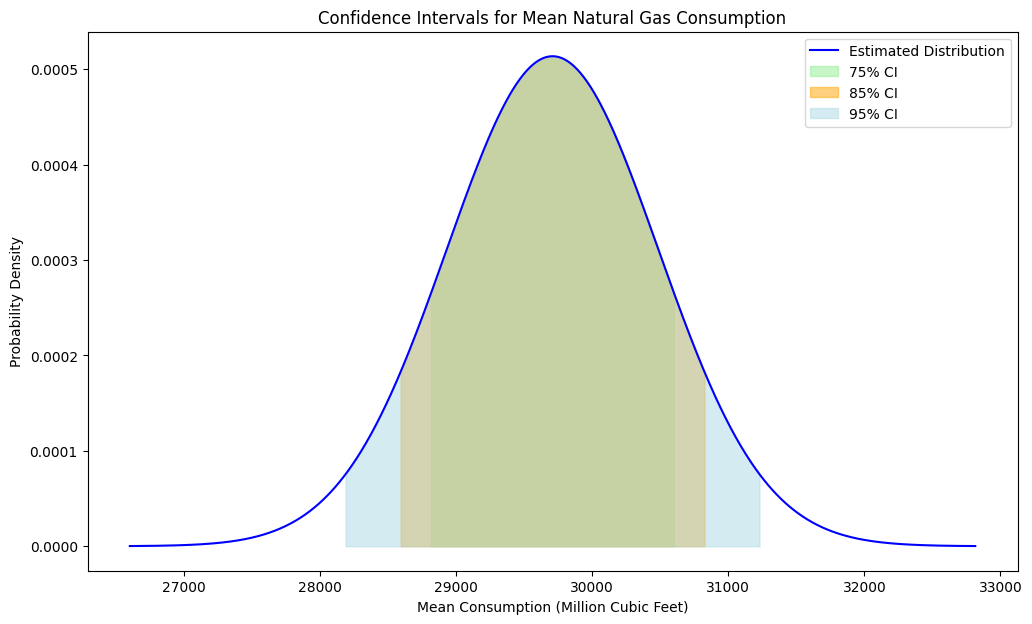

In [ ]:
# Change plot to distribution curve:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

ci_75 = (28814.904062130645, 30601.610837384254)
ci_85 = (28590.321667509084, 30826.193232005815)
ci_95 = (28186.137407846116, 31230.377491668783)

mean_estimate = np.mean(ci_95)
std_estimate = (ci_95[1] - mean_estimate) / norm.ppf(0.975)  # Estimate std dev from 95% CI

x_dist = np.linspace(mean_estimate - 4*std_estimate, mean_estimate + 4*std_estimate, 1000)
y_dist = norm.pdf(x_dist, mean_estimate, std_estimate)

plt.figure(figsize=(12, 7))
plt.plot(x_dist, y_dist, label='Estimated Distribution', color='blue')

# Highlight intervals
plt.fill_between(x_dist, y_dist, where=(x_dist > ci_75[0]) & (x_dist < ci_75[1]), color='lightgreen', alpha=0.5, label='75% CI')
plt.fill_between(x_dist, y_dist, where=(x_dist > ci_85[0]) & (x_dist < ci_85[1]), color='orange', alpha=0.5, label='85% CI')
plt.fill_between(x_dist, y_dist, where=(x_dist > ci_95[0]) & (x_dist < ci_95[1]), color='lightblue', alpha=0.5, label='95% CI')

plt.xlabel('Mean Consumption (Million Cubic Feet)')
plt.ylabel('Probability Density')
plt.title('Confidence Intervals for Mean Natural Gas Consumption')
plt.legend()
plt.show()



### **Task 7**
> Completed by Chloe

---


Decide on a null hypothesis, and based on the data, determine whether to reject or  fail to reject it. Provide detailed explanations of your findings in 1-2 paragraphs.

**Deciding on Null Hypothesis:**

H_0: mean = 30,000 MMcf

H_1: mean != 30,000MMcF

α = 0.05

In [ ]:
from scipy import stats

t_stat, p_value = stats.ttest_1samp(df['natural_gas_consumption_Million_Cubic_Feet'], 30000)
# ttest_1samp(dataset[list], mean being compared against)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -0.37567558635935516
P-value: 0.7071602138662345


Since p > 0.05, we fail to reject the null hypothesis. This means that there is not strong enough evidence that our mean values for population and sample data doesn't have a large difference when comparing between different confidence intervals.

### **Task 8**
> Completed by Abby
---

Select another column (feature/variable). Find the correlation coefficient and coefficient of determination. Provide detailed explanations of your findings in 1-2 paragraphs

In [ ]:
# Correlation coefficient and coefficient of determination
correlation_coefficient = df['year'].corr(df['natural_gas_consumption_Million_Cubic_Feet'])
coefficient_of_determination = correlation_coefficient ** 2

print("Correlation Coefficient:", correlation_coefficient)
print("Coefficient of Determination:", coefficient_of_determination)

Correlation Coefficient: 0.014666866641427133
Coefficient of Determination: 0.014667257580645137



The correlation coefficient describes how closely related two variables are, in this case 'year' with 'natural_gas_consumption_Million_Cubic_Feet'. In this case since it is positive, it means that as 'year' increases, 'natural_gas_consumption_Million_Cubic_Feet' also increases with it. We can also see that the value returned make us notice that the relation between this two variable is weak since 0.014666866641427134 is closer to 0 than to 1. The coefficient of determination measures how well a 'year' can explain the variation of 'natural_gas_consumption_Million_Cubic_Feet', which is in this case the 'year' doesn't explain it since 0.00021511697707740806 is closer to 0 than to 1.

### **Task 9**
> Completed by Abby Fernandez
---

Which other variables are the most effective ones? Test your models with a sample  of the variables. How is this affecting ��2 adjusted? Provide detailed explanations  of your findings in 1-2 paragraphs.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select subset of variables
selected_variables = ['year', 'month', 'state_or_region_name', 'sector-name']
# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['state_or_region_name', 'sector-name'])

# Create feature matrix X and target variable y
X = df[selected_variables]
y = df['natural_gas_consumption_Million_Cubic_Feet']

# Fit linear regression model
model = LinearRegression()
model.fit(X_encoded, y)

# Calculate adjusted R^2
n = len(y)
p = X_encoded.shape[1]
r_squared = model.score(X_encoded, y)
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

print("Adjusted R^2 with 'year', 'month', 'state_or_region_name', 'sector-name' variables:", adjusted_r_squared)

Adjusted R^2 with 'year', 'month', 'state_or_region_name', 'sector-name' variables: 0.5049628051682925


To see how effective our variables are in impacting 'natural_gas_consumption_Million_Cubic_Feet', we selected an array of sample variables which were 'year', 'month', 'state_or_region_name', 'sector-name'. We fitted a linear regression model and calculated adjust R^2 to see how fit our sample variables actually were to evaluate 'natural_gas_consumption_Million_Cubic_Feet'. As our answer was around 0.505, our variable fit well until a 50.5% to determine the natural gas consumption. Probably with more other variables our adjusted R^2 may increase and we could find a correct sample variables that actually impact into the natural gas consumption more than our actual sample variables.  